In [1]:
import os
import pandas as pd
#import sqlalchemy
import numpy as np

from utils import *

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

# Lectura archivos Excel

In [2]:
data_path = os.getcwd() + "//Datos" #Definir ruta de búsqueda

In [3]:
# check que la estructura de datos que se cargan de los 3 archivos es la misma
df1 = pd.read_excel(data_path + "//derechos_aseo_e_it_2014.xlsx", skiprows=1, engine='openpyxl')
df2 = pd.read_excel(data_path + "//derechos_aseo_e_it_2018.xlsx", skiprows=1, engine='openpyxl')
df3 = pd.read_excel(data_path + "//derechos_aseo_e_it_2022.xlsx", skiprows=1, engine='openpyxl')
        
#check_data(df1, df2, df3)

columns = [val for val in mapper_2.values()] #Crear lista con nombres a utilizar en el dataframe
df = pd.DataFrame(columns=columns)   #Crea dataframe vacío con líneas definidas antes

for i, item in enumerate(zip([df1,df2,df3], [2014,2018,2022])):
    year = item[1]
    try:
        item[0].drop(0, inplace=True)
    except:
        None
        
    item[0].loc[:,"Año"] = year
    item[0].rename(mapper=mapper_2, axis=1, inplace=True) #Unir archivos
    
    df = pd.concat([df, item[0]])
    df.reset_index(drop=True, inplace=True)  
#Cambio formato
df["Codigo"] = df["Codigo"].astype(str).str.zfill(5)
df["Codigo Region"] = df["Codigo"].str[:2]
df["Codigo Provincia"] = df["Codigo"].str[:3]
#Transformación a dato numérico
for col in df.columns:
    if col[:3] == "IAD" or col[:3] == "BGM":
        df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

df.head()

Codigo      Municipio     IDA  IDAxIT       IT       IPP      GDA     Año  \
0  01101        IQUIQUE  959868  636724  5238434  26028727  3265198  2014.0   
1  01107  ALTO HOSPICIO   78971   26959   311312   3105317  1029594  2014.0   
2  01401   POZO ALMONTE    5622    1550   193277   3813077   176022  2014.0   
3  01402         CAMIÑA     256       0       93     99372    62537  2014.0   
4  01403       COLCHANE    1020     893      723    133144    37857  2014.0   

  Codigo Region Codigo Provincia  
0            01              011  
1            01              011  
2            01              014  
3            01              014  
4            01              014

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Codigo            1035 non-null   object 
 1   Municipio         1035 non-null   object 
 2   IDA               1035 non-null   object 
 3   IDAxIT            1035 non-null   object 
 4   IT                1035 non-null   object 
 5   IPP               1035 non-null   object 
 6   GDA               1035 non-null   object 
 7   Año               1035 non-null   float64
 8   Codigo Region     1035 non-null   object 
 9   Codigo Provincia  1035 non-null   object 
dtypes: float64(1), object(9)
memory usage: 81.0+ KB


In [6]:
for col in ["IDA", "IDAxIT", "IT", "IPP", "GDA"]:
    df[col] = pd.to_numeric(df[col], downcast="float", errors="coerce")

df.head()

Codigo      Municipio       IDA    IDAxIT         IT         IPP        GDA  \
0  01101        IQUIQUE  959868.0  636724.0  5238434.0  26028727.0  3265198.0   
1  01107  ALTO HOSPICIO   78971.0   26959.0   311312.0   3105317.0  1029594.0   
2  01401   POZO ALMONTE    5622.0    1550.0   193277.0   3813077.0   176022.0   
3  01402         CAMIÑA     256.0       0.0       93.0     99372.0    62537.0   
4  01403       COLCHANE    1020.0     893.0      723.0    133144.0    37857.0   

      Año Codigo Region Codigo Provincia  
0  2014.0            01              011  
1  2014.0            01              011  
2  2014.0            01              014  
3  2014.0            01              014  
4  2014.0            01              014

In [9]:
# IPP = 'IADM41',  IT = 'IADM140'
# Cálculo del porcentaje que representa el Impuesto Territorial (IT) en los Ingresos Propios Permanentes (PP)
df["%IT_en_IPP"] = 100.0*df['IT']/df['IPP']
df["DDAA"] = df["IDA"] + df["IDAxIT"]
df["%DA_en_IPP"] = 100.0*df["DDAA"]/df['IPP']
df["balance_DDAA"] = df["DDAA"] - df["GDA"]
df

Codigo      Municipio       IDA    IDAxIT         IT         IPP  \
0     01101        IQUIQUE  959868.0  636724.0  5238434.0  26028727.0   
1     01107  ALTO HOSPICIO   78971.0   26959.0   311312.0   3105317.0   
2     01401   POZO ALMONTE    5622.0    1550.0   193277.0   3813077.0   
3     01402         CAMIÑA     256.0       0.0       93.0     99372.0   
4     01403       COLCHANE    1020.0     893.0      723.0    133144.0   
...     ...            ...       ...       ...        ...         ...   
1030  16301     SAN CARLOS  179054.0   51026.0  1018734.0   3277933.0   
1031  16302       COIHUECO   36692.0   12141.0   549211.0   1468724.0   
1032  16303         ÑIQUÉN    1482.0     180.0   151400.0    739859.0   
1033  16304     SAN FABIÁN    9771.0    6395.0   140562.0    540255.0   
1034  16305    SAN NICOLÁS    3634.0       0.0   205111.0   1745464.0   

            GDA     Año Codigo Region Codigo Provincia  %IT_en_IPP       DDAA  \
0     3265198.0  2014.0            01              011   20.125587  1596592.0   
1     1029594.0  2014.0            01              011   10.025128   105930.0   
2      176022.0  2014.0            01              014    5.068794     7172.0   
3       62537.0  2014.0            01              014    0.093588      256.0   
4       37857.0  2014.0            01              014    0.543021     1913.0   
...         ...     ...           ...              ...         ...        ...   
1030   236892.0  2022.0            16              163   31.078549   230080.0   
1031   577517.0  2022.0            16              163   37.393751    48833.0   
1032        0.0  2022.0            16              163   20.463359     1662.0   
1033        0.0  2022.0            16              163   26.017714    16166.0   
1034   196514.0  2022.0            16              163   11.751087     3634.0   

          BSASC  %DA_en_IPP  balance_DDAA  
0     3265198.0    6.133961    -1668606.0  
1     1029594.0    3.411246     -923664.0  
2      176022.0    0.188090     -168850.0  
3       62537.0    0.257618      -62281.0  
4       37857.0    1.436790      -35944.0  
...         ...         ...           ...  
1030   236892.0    7.019057       -6812.0  
1031   577517.0    3.324859     -528684.0  
1032        0.0    0.224637        1662.0  
1033        0.0    2.992291       16166.0  
1034   196514.0    0.208197     -192880.0  

[1035 rows x 15 columns]

#  Proporción del IT en el IPP

In [10]:
df["Region"] = df["Codigo Region"].replace(to_replace=region_dict)
df

Codigo      Municipio       IDA    IDAxIT         IT         IPP  \
0     01101        IQUIQUE  959868.0  636724.0  5238434.0  26028727.0   
1     01107  ALTO HOSPICIO   78971.0   26959.0   311312.0   3105317.0   
2     01401   POZO ALMONTE    5622.0    1550.0   193277.0   3813077.0   
3     01402         CAMIÑA     256.0       0.0       93.0     99372.0   
4     01403       COLCHANE    1020.0     893.0      723.0    133144.0   
...     ...            ...       ...       ...        ...         ...   
1030  16301     SAN CARLOS  179054.0   51026.0  1018734.0   3277933.0   
1031  16302       COIHUECO   36692.0   12141.0   549211.0   1468724.0   
1032  16303         ÑIQUÉN    1482.0     180.0   151400.0    739859.0   
1033  16304     SAN FABIÁN    9771.0    6395.0   140562.0    540255.0   
1034  16305    SAN NICOLÁS    3634.0       0.0   205111.0   1745464.0   

            GDA     Año Codigo Region Codigo Provincia  %IT_en_IPP       DDAA  \
0     3265198.0  2014.0            01              011   20.125587  1596592.0   
1     1029594.0  2014.0            01              011   10.025128   105930.0   
2      176022.0  2014.0            01              014    5.068794     7172.0   
3       62537.0  2014.0            01              014    0.093588      256.0   
4       37857.0  2014.0            01              014    0.543021     1913.0   
...         ...     ...           ...              ...         ...        ...   
1030   236892.0  2022.0            16              163   31.078549   230080.0   
1031   577517.0  2022.0            16              163   37.393751    48833.0   
1032        0.0  2022.0            16              163   20.463359     1662.0   
1033        0.0  2022.0            16              163   26.017714    16166.0   
1034   196514.0  2022.0            16              163   11.751087     3634.0   

          BSASC  %DA_en_IPP  balance_DDAA    Region  
0     3265198.0    6.133961    -1668606.0  Tarapacá  
1     1029594.0    3.411246     -923664.0  Tarapacá  
2      176022.0    0.188090     -168850.0  Tarapacá  
3       62537.0    0.257618      -62281.0  Tarapacá  
4       37857.0    1.436790      -35944.0  Tarapacá  
...         ...         ...           ...       ...  
1030   236892.0    7.019057       -6812.0     Ñuble  
1031   577517.0    3.324859     -528684.0     Ñuble  
1032        0.0    0.224637        1662.0     Ñuble  
1033        0.0    2.992291       16166.0     Ñuble  
1034   196514.0    0.208197     -192880.0     Ñuble  

[1035 rows x 16 columns]

In [13]:
df_group_region = df[["Año", "Codigo Region","%IT_en_IPP"]].groupby(by=["Año","Codigo Region"]).mean()["%IT_en_IPP"]
df_group_by_comuna = df[["Año", "Codigo Region", "Municipio","%IT_en_IPP"]].groupby(by=["Año", "Codigo Region", "Municipio"]).mean()["%IT_en_IPP"].to_frame()

for year in [2014, 2018, 2022]:
    for region in df["Codigo Region"].unique():
        promedio_region = df_group_region[(year, region)] #de %IT_en_IPP
        df_group_by_comuna.loc[(year, region),"diff_region"] = df_group_by_comuna.loc[(year, region)]["%IT_en_IPP"].values - promedio_region

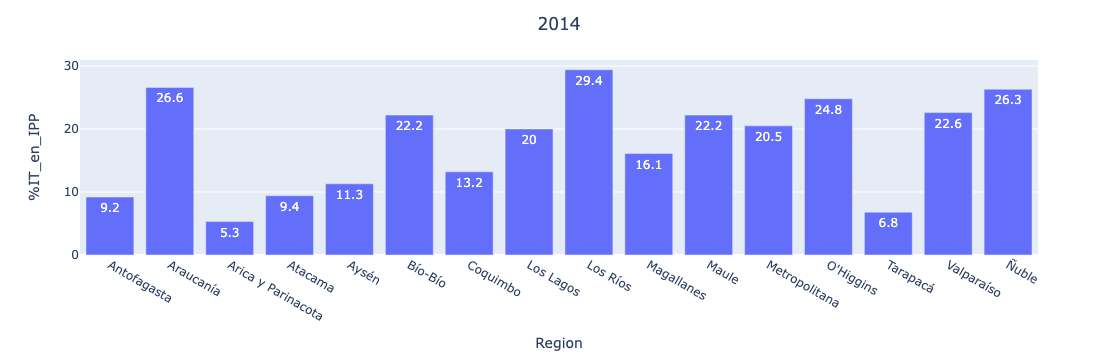

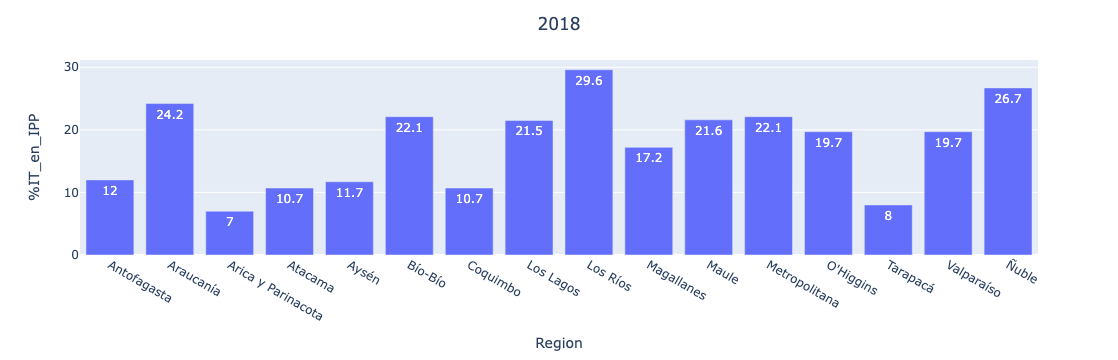

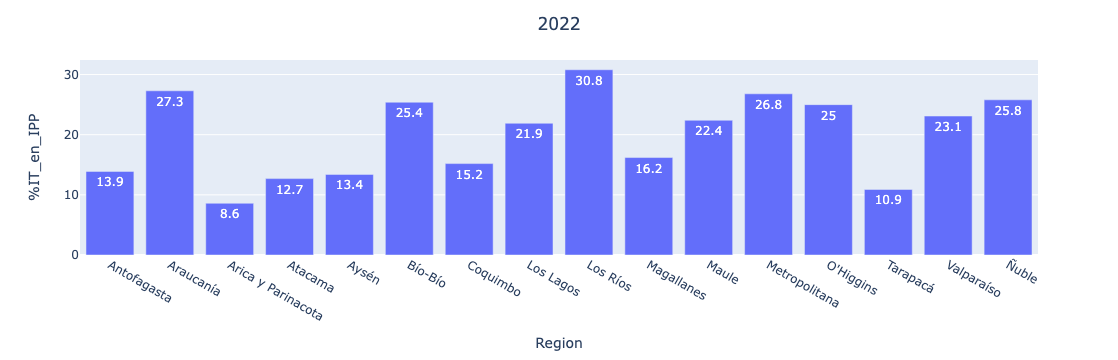

In [11]:
df_groupped = df[["Año","Region","%IT_en_IPP"]].groupby(by=["Año","Region"]).mean().round(1)["%IT_en_IPP"]
for year in [2014, 2018, 2022]:
    df_to_plot = df_groupped[year].reset_index(drop=False)
    fig = px.bar(df_to_plot, x="Region", y="%IT_en_IPP", text_auto=True)
    fig.update_layout(title=dict(text=f"{year}", x=0.5, xanchor="center"),
                     height=400)
    fig.show()

In [23]:
df_group_by_comuna=df_group_by_comuna.round(1)

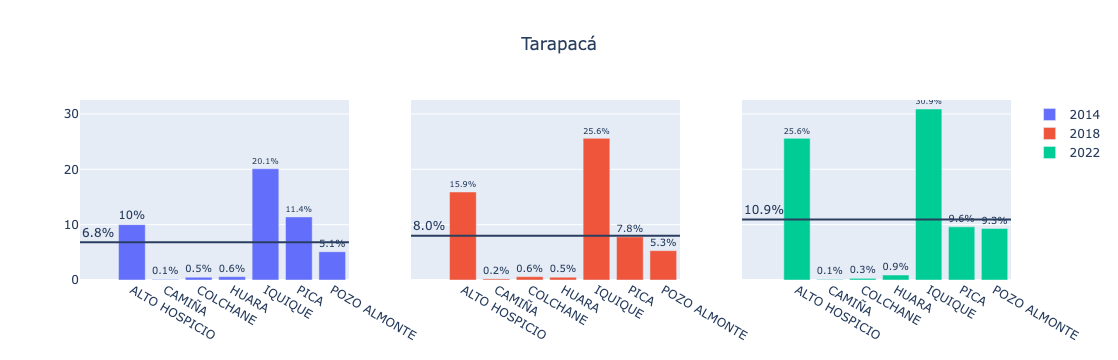

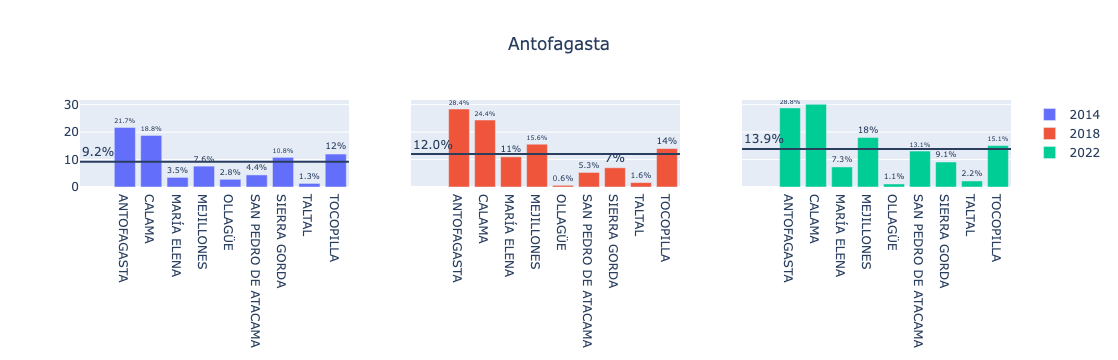

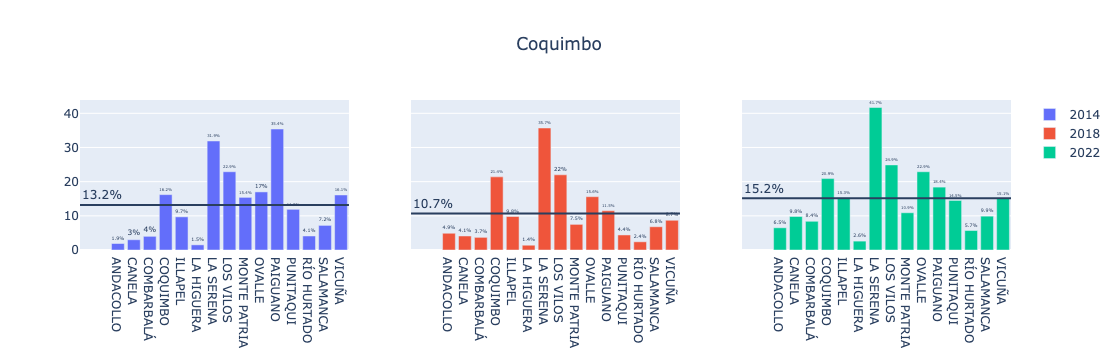

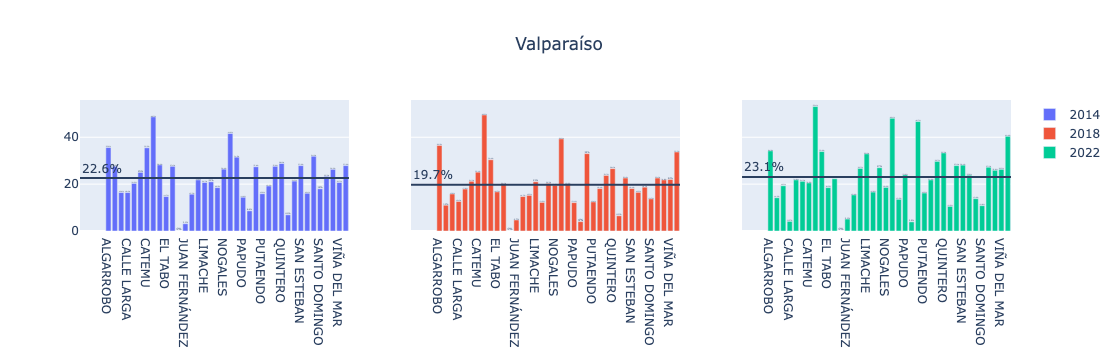

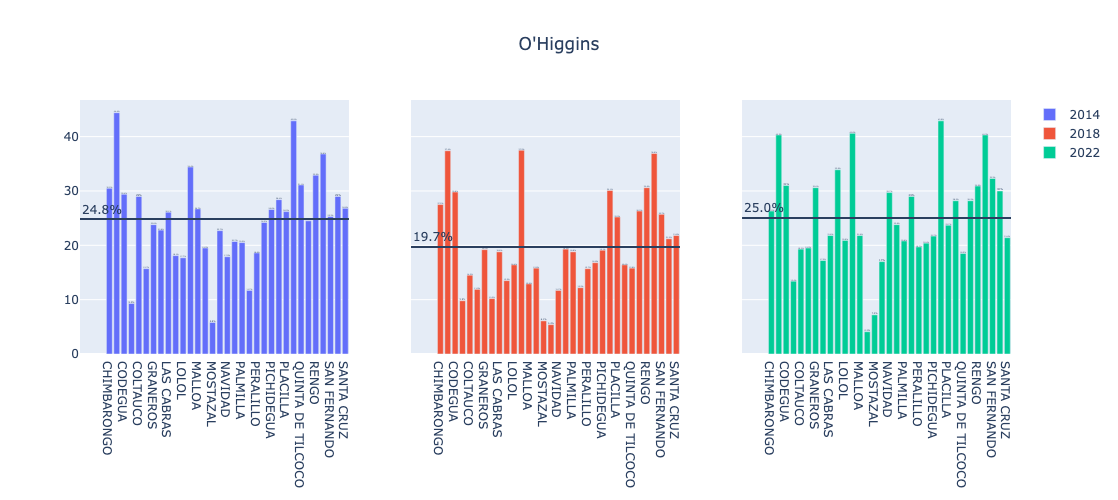

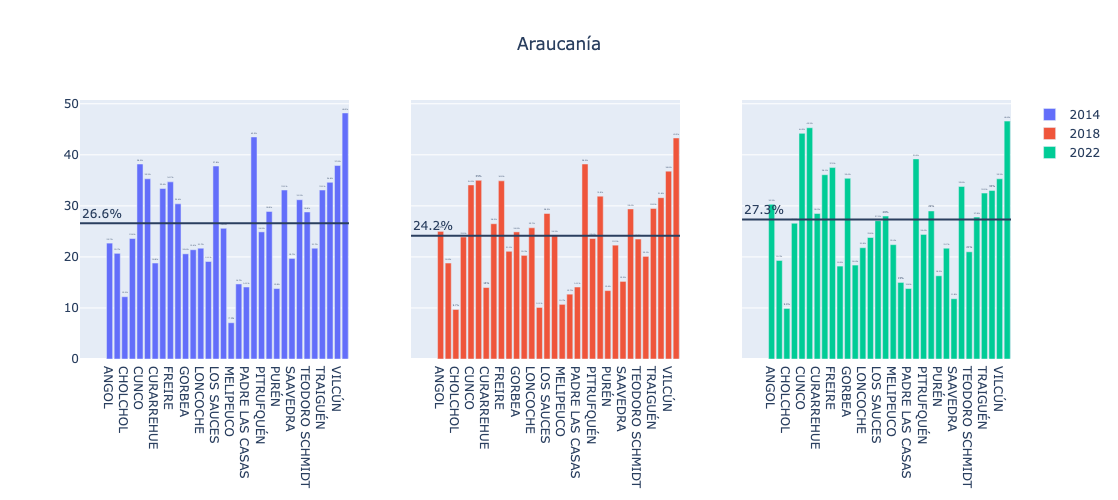

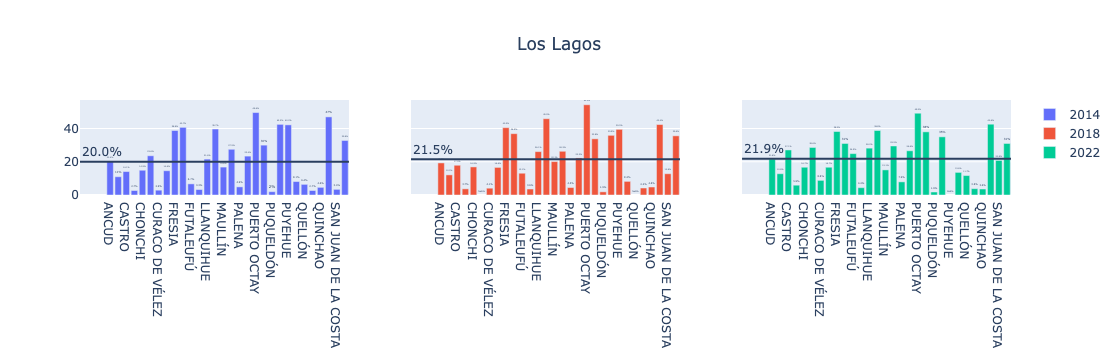

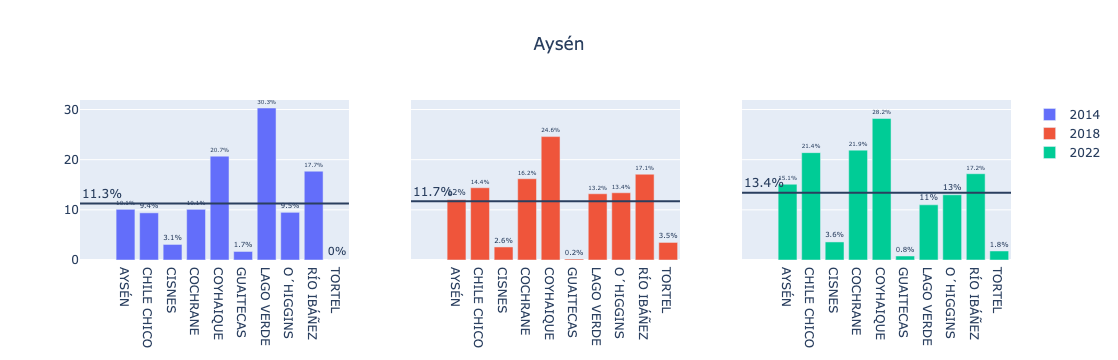

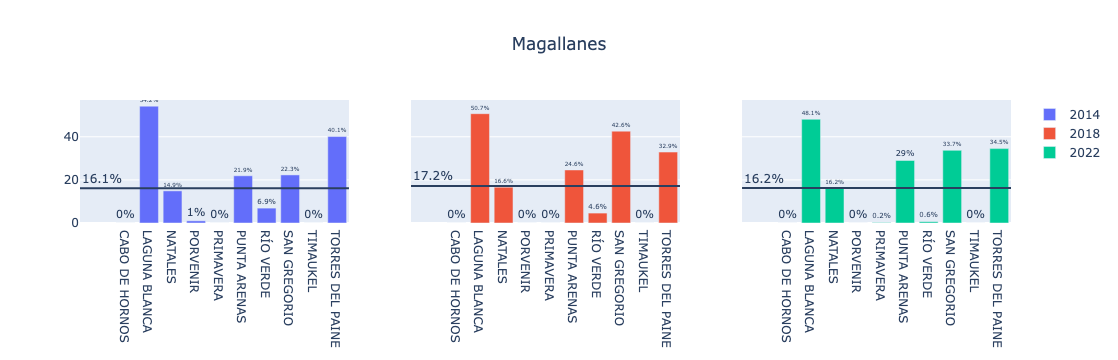

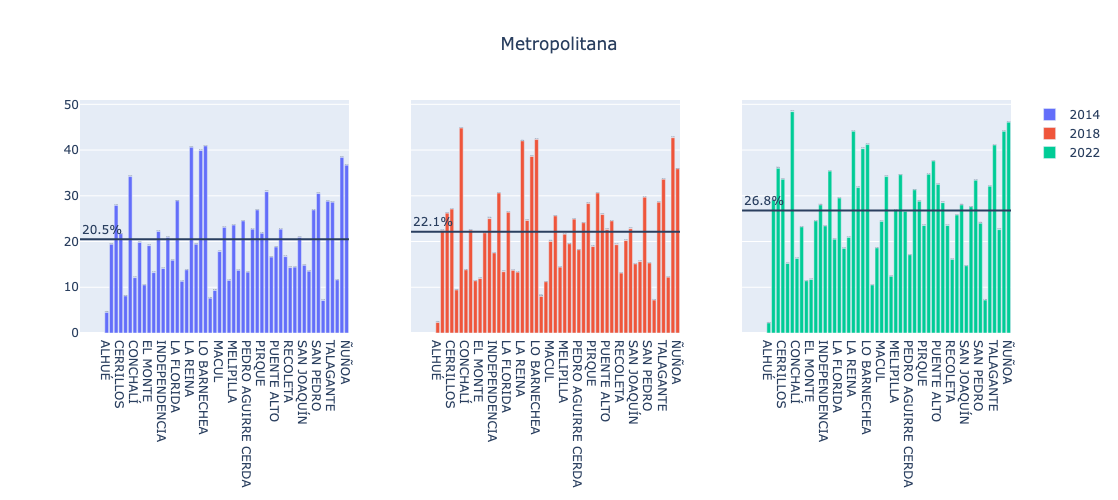

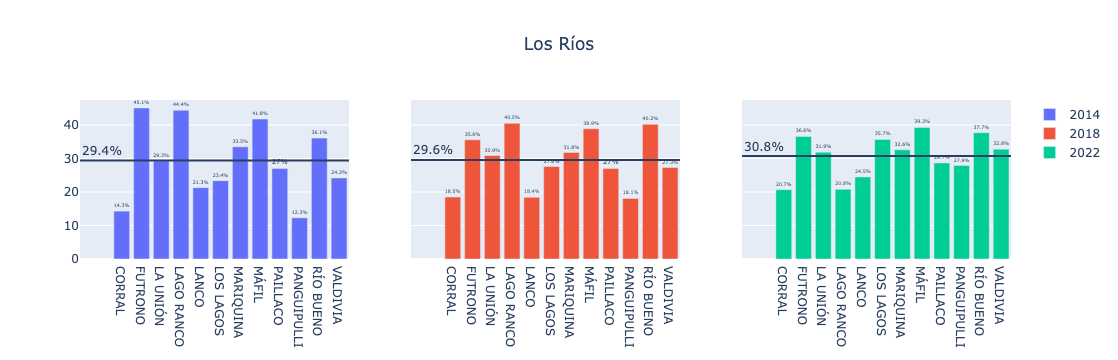

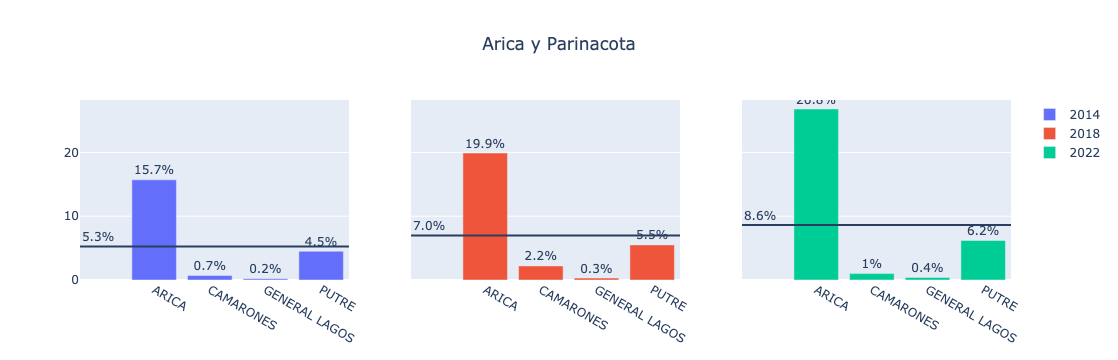

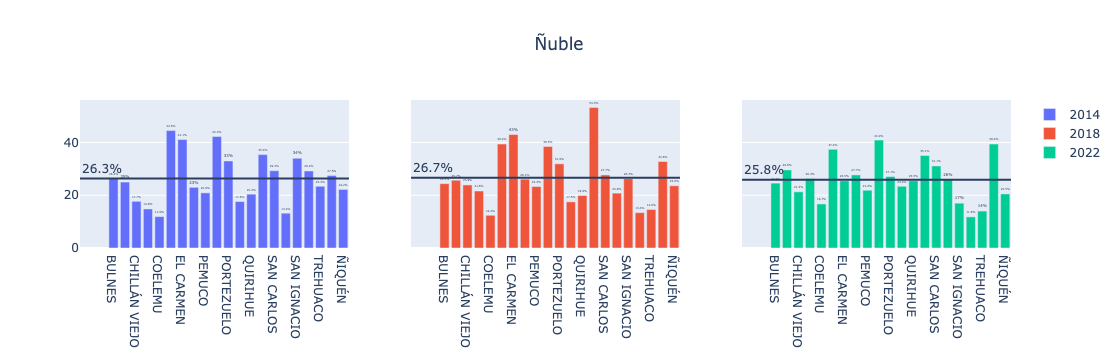

In [25]:
regions = df_group_by_comuna.reset_index()["Codigo Region"].unique()
years = [2014, 2018, 2022]
for region in regions: 
    fig = make_subplots(rows=1, cols=len(years), shared_yaxes=True)
    for i, year in enumerate(years):
        promedio_region = df_group_region[(year, region)]
        fig.add_trace(go.Bar(name=f"{year}",
                             x=df_group_by_comuna.loc[(year, region)].reset_index()["Municipio"],
                             y=df_group_by_comuna.loc[(year, region)].reset_index()["%IT_en_IPP"].round(1),
                             text=df_group_by_comuna.loc[(year, region)].reset_index()["%IT_en_IPP"],
                             textposition="outside",
                             texttemplate="%{y}%"),
                     row=1, col=i+1)
        fig.add_hline(y=promedio_region, row=1, col=i+1)
        fig.add_annotation(x=-1, y=promedio_region,
            text=f"{promedio_region:.1f}%",
            showarrow=False,
            yshift=10, row=1, col=i+1)
        fig.update_layout(title=dict(text=f"{region_dict[region]}", x=0.5, xanchor="center"),
                         height=500)
    fig.show()